# Netflix Movies and TV Shows

This data analysis is part of my project submission for the Python course - [Data Analysis with Python: Zero to Pandas](zerotopandas.com). Over the past few weeks I have learnt how to conduct data visualization and exploratory data analysis using Python, Numpy, Pandas, Matplotlib and Seaborn.

I have picked up a dataset that consists of tv shows and movies available on Netflix as of 2019. I have downloaded this from Kaggle - https://www.kaggle.com/shivamb/netflix-shows.

With this dataset I plan to explore the distribution of Netflix content across Countries, Release Year and Directors. I have cleaned the data before diving into the analysis.

## Downloading the Dataset

First, let's begin by installing opendatasets.

In [1]:
!pip install opendatasets --upgrade --quiet

Now we can download the data, and list the files within the dataset.

In [52]:
dataset_url = 'https://www.kaggle.com/shivamb/netflix-shows' 

In [3]:
import opendatasets as od
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: vinishathakkar
Your Kaggle Key: ········


100%|██████████| 971k/971k [00:00<00:00, 104MB/s]

The dataset has been downloaded and extracted. We have only 1 CSV file within the directory.

In [53]:
data_dir = './netflix-shows'

In [5]:
import os
os.listdir(data_dir)

['netflix_titles.csv']

## Data Preparation and Cleaning

Now that we have downloaded the CSV file, we can load it into a dataframe using Pandas



In [10]:
import pandas as pd

In [11]:
netflix_raw_df = pd.read_csv(data_dir + '/netflix_titles.csv')

Here, we can see that out dataset has 6234 rows and 12 columns. By using df.info() we can see the names, types and Null values for each column. Few rows here like Country, Director, Date Added have NaN values.

In [12]:
netflix_raw_df.shape

(6234, 12)

In [59]:
netflix_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      4265 non-null   object
 4   cast          5664 non-null   object
 5   country       5758 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6224 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB


In [14]:
netflix_raw_df.head(10) #sample of data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
5,80163890,TV Show,Apaches,NaN,"Alberto Ammann, Eloy Azorín, Verónica Echegui,...",Spain,"September 8, 2017",2016,TV-MA,1 Season,"Crime TV Shows, International TV Shows, Spanis...",A young journalist is forced into a life of cr...
6,70304989,Movie,Automata,Gabe Ibáñez,"Antonio Banderas, Dylan McDermott, Melanie Gri...","Bulgaria, United States, Spain, Canada","September 8, 2017",2014,R,110 min,"International Movies, Sci-Fi & Fantasy, Thrillers","In a dystopian future, an insurance adjuster f..."
7,80164077,Movie,Fabrizio Copano: Solo pienso en mi,"Rodrigo Toro, Francisco Schultz",Fabrizio Copano,Chile,"September 8, 2017",2017,TV-MA,60 min,Stand-Up Comedy,Fabrizio Copano takes audience participation t...
8,80117902,TV Show,Fire Chasers,NaN,NaN,United States,"September 8, 2017",2017,TV-MA,1 Season,"Docuseries, Science & Nature TV","As California's 2016 fire season rages, brave ..."
9,70304990,Movie,Good People,Henrik Ruben Genz,"James Franco, Kate Hudson, Tom Wilkinson, Omar...","United States, United Kingdom, Denmark, Sweden","September 8, 2017",2014,R,90 min,"Action & Adventure, Thrillers",A struggling couple can't believe their luck w...


Now we can start our data cleaning step. To make sure we do not mess with the original dataframe, we make all the changes required in a new dataframe called netflix_altered_df.

For the analysis, I am sure I do not need the Show ID and Description columns. So we can drop those from our dataset. 

In [61]:
netflix_altered_df = netflix_raw_df.drop(columns=['show_id', 'description'])

Notice how the columns - Director, Cast, Country and Listed_in have multiple values withint them. It would be hard to do data analysis with such columns, so I take each column and split the values for each cell into rows while keeping the values for other columns intact.

I have used the method listed in a comment by user 'cs95' on this [page](https://stackoverflow.com/questions/50731229/split-cell-into-multiple-rows-in-pandas-dataframe) to split the column values into individual rows

In [62]:
netflix_altered_df[['director','cast', 'country', 'listed_in']].sample(5) #these have multiple entries

,director,cast,country,listed_in
4812,NaN,"Javier Rey, Tristán Ulloa, Antonio Durán 'Morr...",Spain,"Crime TV Shows, International TV Shows, Spanis..."
3857,Alex Lehmann,"Mark Duplass, Ray Romano",United States,"Comedies, Dramas, Independent Movies"
1259,"Joel Coen, Ethan Coen","Liam Neeson, James Franco, Tim Blake Nelson, T...",United States,"Comedies, Dramas"
5310,"Felix Herngren, Måns Herngren","Robert Gustafsson, Jens Hultén, Caroline Boult...",Sweden,"Comedies, International Movies"
132,Archie Borders,"Matt Walsh, Judith Godreche, Reid Scott, Micha...",United States,"Comedies, Independent Movies, Romantic Movies"


In [63]:
#Splitting values for Listed_in column

netflix_altered_df = (netflix_altered_df.set_index(['type', 'title', 'director', 'cast', 'country','date_added', 'release_year', 'rating', 'duration'])
   .apply(lambda x: x.str.split(',').explode())
   .reset_index()) 
netflix_altered_df.head(10)

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
0,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,Children & Family Movies
1,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,Comedies
2,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy
3,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV
4,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV
5,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies
6,TV Show,Apaches,NaN,"Alberto Ammann, Eloy Azorín, Verónica Echegui,...",Spain,"September 8, 2017",2016,TV-MA,1 Season,Crime TV Shows
7,TV Show,Apaches,NaN,"Alberto Ammann, Eloy Azorín, Verónica Echegui,...",Spain,"September 8, 2017",2016,TV-MA,1 Season,International TV Shows
8,TV Show,Apaches,NaN,"Alberto Ammann, Eloy Azorín, Verónica Echegui,...",Spain,"September 8, 2017",2016,TV-MA,1 Season,Spanish-Language TV Shows
9,Movie,Automata,Gabe Ibáñez,"Antonio Banderas, Dylan McDermott, Melanie Gri...","Bulgaria, United States, Spain, Canada","September 8, 2017",2014,R,110 min,International Movies


In [64]:
#Splitting values for Country column

netflix_altered_df = (netflix_altered_df.set_index(['type', 'title', 'director', 'cast', 'date_added', 'release_year', 'rating', 'duration', 'listed_in'])
    .apply(lambda x: x.str.split(',').explode())
    .reset_index()) 

netflix_altered_df.head(10)

,type,title,director,cast,date_added,release_year,rating,duration,listed_in,country
0,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","September 9, 2019",2019,TV-PG,90 min,Children & Family Movies,United States
1,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","September 9, 2019",2019,TV-PG,90 min,Children & Family Movies,India
2,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","September 9, 2019",2019,TV-PG,90 min,Children & Family Movies,South Korea
3,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","September 9, 2019",2019,TV-PG,90 min,Children & Family Movies,China
4,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","September 9, 2019",2019,TV-PG,90 min,Comedies,United States
5,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","September 9, 2019",2019,TV-PG,90 min,Comedies,India
6,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","September 9, 2019",2019,TV-PG,90 min,Comedies,South Korea
7,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","September 9, 2019",2019,TV-PG,90 min,Comedies,China
8,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,United Kingdom
9,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...","September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,United States


In [65]:
#Splitting values for Cast column

netflix_altered_df = (netflix_altered_df.set_index(['type', 'title', 'director', 'country','date_added', 'release_year', 'rating', 'duration', 'listed_in'])
    .apply(lambda x: x.str.split(',').explode())
    .reset_index()) 

netflix_altered_df.head(10)

,type,title,director,country,date_added,release_year,rating,duration,listed_in,cast
0,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby",United States,"September 9, 2019",2019,TV-PG,90 min,Children & Family Movies,Alan Marriott
1,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby",United States,"September 9, 2019",2019,TV-PG,90 min,Children & Family Movies,Andrew Toth
2,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby",United States,"September 9, 2019",2019,TV-PG,90 min,Children & Family Movies,Brian Dobson
3,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby",United States,"September 9, 2019",2019,TV-PG,90 min,Children & Family Movies,Cole Howard
4,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby",United States,"September 9, 2019",2019,TV-PG,90 min,Children & Family Movies,Jennifer Cameron
5,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby",United States,"September 9, 2019",2019,TV-PG,90 min,Children & Family Movies,Jonathan Holmes
6,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby",United States,"September 9, 2019",2019,TV-PG,90 min,Children & Family Movies,Lee Tockar
7,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby",United States,"September 9, 2019",2019,TV-PG,90 min,Children & Family Movies,Lisa Durupt
8,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby",United States,"September 9, 2019",2019,TV-PG,90 min,Children & Family Movies,Maya Kay
9,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby",United States,"September 9, 2019",2019,TV-PG,90 min,Children & Family Movies,Michael Dobson


In [66]:
#Splitting values for Director column

netflix_altered_df = (netflix_altered_df.set_index(['type', 'title', 'country', 'cast', 'date_added', 'release_year', 'rating', 'duration', 'listed_in'])
    .apply(lambda x: x.str.split(',').explode())
    .reset_index())

netflix_altered_df.head(10)

,type,title,country,cast,date_added,release_year,rating,duration,listed_in,director
0,Movie,Norm of the North: King Sized Adventure,United States,Alan Marriott,"September 9, 2019",2019,TV-PG,90 min,Children & Family Movies,Richard Finn
1,Movie,Norm of the North: King Sized Adventure,United States,Alan Marriott,"September 9, 2019",2019,TV-PG,90 min,Children & Family Movies,Tim Maltby
2,Movie,Norm of the North: King Sized Adventure,United States,Andrew Toth,"September 9, 2019",2019,TV-PG,90 min,Children & Family Movies,Richard Finn
3,Movie,Norm of the North: King Sized Adventure,United States,Andrew Toth,"September 9, 2019",2019,TV-PG,90 min,Children & Family Movies,Tim Maltby
4,Movie,Norm of the North: King Sized Adventure,United States,Brian Dobson,"September 9, 2019",2019,TV-PG,90 min,Children & Family Movies,Richard Finn
5,Movie,Norm of the North: King Sized Adventure,United States,Brian Dobson,"September 9, 2019",2019,TV-PG,90 min,Children & Family Movies,Tim Maltby
6,Movie,Norm of the North: King Sized Adventure,United States,Cole Howard,"September 9, 2019",2019,TV-PG,90 min,Children & Family Movies,Richard Finn
7,Movie,Norm of the North: King Sized Adventure,United States,Cole Howard,"September 9, 2019",2019,TV-PG,90 min,Children & Family Movies,Tim Maltby
8,Movie,Norm of the North: King Sized Adventure,United States,Jennifer Cameron,"September 9, 2019",2019,TV-PG,90 min,Children & Family Movies,Richard Finn
9,Movie,Norm of the North: King Sized Adventure,United States,Jennifer Cameron,"September 9, 2019",2019,TV-PG,90 min,Children & Family Movies,Tim Maltby


Now that I have dropped two columns and split all the columns that have multiple values, let us check the number of rows and columns in our dataframe.

As you can see, we now have 1,39,984 rows and 10 columns.

In [21]:
netflix_altered_df.shape 
#or split tv ashows an movies since their duration is seasons or minutes. 

(139984, 10)

But we still have the issue of missing values for some of our columns. To keep things simple, I decided to go ahead and drop all the rows that have even one NaN value. I did that using dropna() method and that gave me a dataframe with 98,233 rows.

In [22]:
netflix_altered_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139984 entries, 0 to 139983
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   type          139984 non-null  object
 1   title         139984 non-null  object
 2   country       134194 non-null  object
 3   cast          138493 non-null  object
 4   date_added    139825 non-null  object
 5   release_year  139984 non-null  int64 
 6   rating        139911 non-null  object
 7   duration      139984 non-null  object
 8   listed_in     139984 non-null  object
 9   director      101073 non-null  object
dtypes: int64(1), object(9)
memory usage: 10.7+ MB


In [68]:
#Looking at a sample of rows that have NaN values

netflix_altered_df[netflix_altered_df.isna().any(axis=1)].sample(10) 

,type,title,country,cast,date_added,release_year,rating,duration,listed_in,director
139316,TV Show,Señora Acero,United States,Jorge Zárate,"April 28, 2019",2018,TV-14,5 Seasons,International TV Shows,NaN
134455,TV Show,Club of Crows,Mexico,Eileen Yañez,"January 25, 2019",2019,TV-MA,4 Seasons,Spanish-Language TV Shows,NaN
43176,TV Show,Borderliner,Norway,Frode Winther,"March 6, 2018",2017,TV-MA,1 Season,TV Dramas,NaN
54905,TV Show,7SEEDS,NaN,Shizuka Ito,"June 28, 2019",2019,TV-MA,1 Season,Anime Series,NaN
137228,TV Show,Space Jungle,NaN,Kim Min-hee,"December 1, 2019",2016,TV-Y7,2 Seasons,Kids' TV,NaN
25853,TV Show,Nobody's Looking,Brazil,Leandro Ramos,"November 22, 2019",2019,TV-MA,1 Season,TV Comedies,NaN
123313,TV Show,Burned Cocoon,Turkey,Serdar Özer,"April 1, 2017",2005,TV-14,1 Season,TV Dramas,NaN
117071,TV Show,KO One Return,Taiwan,Sylvia Wang,"April 30, 2019",2012,TV-14,1 Season,TV Comedies,NaN
137978,TV Show,Ultimate Beastmaster México,Japan,Francesco Facchinetti,"August 31, 2018",2018,TV-14,3 Seasons,Spanish-Language TV Shows,NaN
47617,TV Show,If I Hadn't Met You,Spain,Andrea Ros,"March 15, 2019",2018,TV-MA,1 Season,Romantic TV Shows,NaN


In [69]:
#Dropping any row that has a NaN value
netflix_altered_df = netflix_altered_df.dropna()
netflix_altered_df.shape

(98233, 10)

Next, I want to change the name of the column Listed_in to Genre, since it is more intuitive.

Also, since we split the values of columns like country, listed_in, directors and cast, the output now has values that has spaces before and after it. So I called the str.strip() method to get rid of those spaces.

In [73]:
#Rename column

netflix_altered_df = netflix_altered_df.rename(columns={'listed_in': 'genre'})

netflix_altered_df.head(5)

,type,title,country,cast,date_added,release_year,rating,duration,genre,director
0,Movie,Norm of the North: King Sized Adventure,United States,Alan Marriott,"September 9, 2019",2019,TV-PG,90 min,Children & Family Movies,Richard Finn
1,Movie,Norm of the North: King Sized Adventure,United States,Alan Marriott,"September 9, 2019",2019,TV-PG,90 min,Children & Family Movies,Tim Maltby
2,Movie,Norm of the North: King Sized Adventure,United States,Andrew Toth,"September 9, 2019",2019,TV-PG,90 min,Children & Family Movies,Richard Finn
3,Movie,Norm of the North: King Sized Adventure,United States,Andrew Toth,"September 9, 2019",2019,TV-PG,90 min,Children & Family Movies,Tim Maltby
4,Movie,Norm of the North: King Sized Adventure,United States,Brian Dobson,"September 9, 2019",2019,TV-PG,90 min,Children & Family Movies,Richard Finn


In [74]:
#strips spaces off of Country, Genre, Cast and Director

netflix_altered_df['country'] = netflix_altered_df['country'].str.strip()
netflix_altered_df['genre'] = netflix_altered_df['genre'].str.strip()
netflix_altered_df['cast'] = netflix_altered_df['cast'].str.strip()
netflix_altered_df['director'] = netflix_altered_df['director'].str.strip()


## Exploratory Analysis and Visualization

Now, that we have cleaned our data, we can start working on data vizulizations and answering some qestions.



Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [29]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

## The distribution of TV Show and Movies on Netflix

I would like to start by looking at the distribution of content on Netflix between Movies and TV shows. 

Since we have repeating values in many columns because of the row split, I am going to get unique Title and Type combinations by using drop.duplicates() method. Next, I will subset the Type column for this dataframe and count number of occurances of TV Show and Movie by using value_counts(). Once that is done I will plot the numbers in a Pie Chart using plot.pie

In [84]:
netflix_type_df = netflix_altered_df[['title','type']].drop_duplicates()
netflix_type_df

,title,type
0,Norm of the North: King Sized Adventure,Movie
181,#realityhigh,Movie
208,Automata,Movie
316,Fabrizio Copano: Solo pienso en mi,Movie
320,Good People,Movie
...,...,...
138026,The Great British Baking Show,TV Show
138392,Miraculous: Tales of Ladybug & Cat Noir,TV Show
138693,Sacred Games,TV Show
138995,Men on a Mission,TV Show


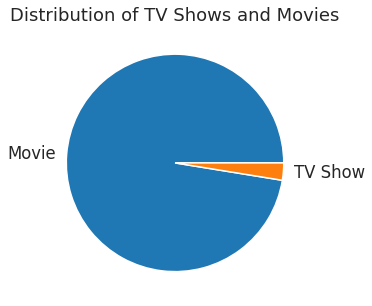

In [85]:
netflix_type_count  = netflix_type_df['type'].value_counts()
netflix_type_count.plot.pie(y=netflix_type_count.index, figsize=(5, 5),title='Distribution of TV Shows and Movies',ylabel='');


## The distribution of Movies and TV Shows on Netflix for top Countries

Similar to the above method, I am going to get unique Title, Country and Type combinations first. Next, I will subset Country and Type column from the dataframe and count number of occurances of TV Show and Movie released in each country. 

In [86]:
netflix_country_df = netflix_altered_df[['title','country', 'type']].drop_duplicates()
netflix_country_df #create a df for unique movie title, country and type combination

,title,country,type
0,Norm of the North: King Sized Adventure,United States,Movie
20,Norm of the North: King Sized Adventure,India,Movie
40,Norm of the North: King Sized Adventure,South Korea,Movie
60,Norm of the North: King Sized Adventure,China,Movie
181,#realityhigh,United States,Movie
...,...,...,...
138432,Miraculous: Tales of Ladybug & Cat Noir,Japan,TV Show
138693,Sacred Games,India,TV Show
138703,Sacred Games,United States,TV Show
138995,Men on a Mission,South Korea,TV Show


In [87]:
netflix_country_counts = netflix_country_df[['country', 'type']].value_counts()

netflix_country_counts

country         type   
United States   Movie      1680
India           Movie       753
United Kingdom  Movie       323
Canada          Movie       189
France          Movie       188
                           ... 
Malta           Movie         1
Montenegro      Movie         1
Nicaragua       Movie         1
Pakistan        TV Show       1
                Movie         1
Length: 120, dtype: int64

I want the Movie and TV shows to be set as columns so I can see each countries counts for Movie and TV Shows side by side. For this, I will use .unstack() and then replace the NaNs in the output with 0 by using fillna().

In [88]:
netflix_country_counts = netflix_country_counts.unstack(level=-1).reset_index().fillna(0)
netflix_country_counts.sort_values(by=['Movie'], ascending=False)

type,country,Movie,TV Show
90,United States,1680.0,33.0
34,India,753.0,5.0
89,United Kingdom,323.0,18.0
12,Canada,189.0,5.0
25,France,188.0,3.0
...,...,...,...
57,Nicaragua,1.0,0.0
61,Panama,1.0,0.0
62,Paraguay,1.0,0.0
70,Saudi Arabia,1.0,0.0


I want to create a new column Total Content so I can see which country has the most content combined. So I create a new column by adding up values of Movie and TV Show. Then, I create a dataframe with only the top 10 countries by Total Content so I can create a Stacked Bar chart.

In [89]:
netflix_country_counts['Total Content'] = netflix_country_counts.Movie + netflix_country_counts['TV Show']
netflix_country_counts.sort_values(by=['Total Content'], ascending=False)

type,country,Movie,TV Show,Total Content
90,United States,1680.0,33.0,1713.0
34,India,753.0,5.0,758.0
89,United Kingdom,323.0,18.0,341.0
12,Canada,189.0,5.0,194.0
25,France,188.0,3.0,191.0
...,...,...,...,...
57,Nicaragua,1.0,0.0,1.0
61,Panama,1.0,0.0,1.0
62,Paraguay,1.0,0.0,1.0
70,Saudi Arabia,1.0,0.0,1.0


In [90]:
netflix_top_countrycount = netflix_country_counts.sort_values(by=['Total Content'], ascending=False).head(10)
netflix_top_countrycount

type,country,Movie,TV Show,Total Content
90,United States,1680.0,33.0,1713.0
34,India,753.0,5.0,758.0
89,United Kingdom,323.0,18.0,341.0
12,Canada,189.0,5.0,194.0
25,France,188.0,3.0,191.0
80,Spain,116.0,4.0,120.0
27,Germany,112.0,1.0,113.0
31,Hong Kong,91.0,0.0,91.0
41,Japan,70.0,10.0,80.0
15,China,78.0,1.0,79.0


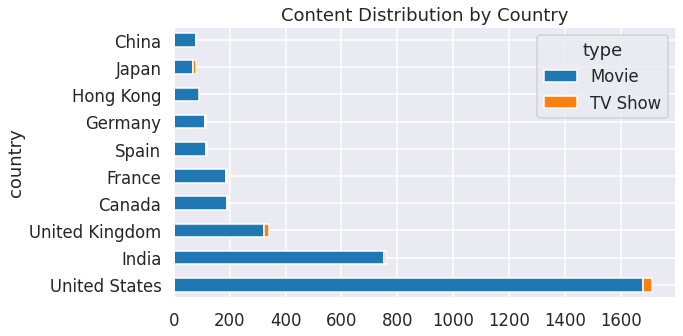

In [91]:
netflix_top_countrycount[['country', 'Movie', 'TV Show']].plot.barh(x='country',stacked=True, title='Content Distribution by Country');

This graphs shows us the number of TV shows compared to Movies offered in each country. United States has the most number of TV shows and Movies offered by Netflix. The next country India only has half the amount of content as the U.S.

## The distribution of Movies and TV Shows on Netflix for content released after year 2000

We all know that TV shows are more popular than ever after the boom of streaming services. Netflix has been adding a lot of original content for TV shows and Movies both. We can take a look at the ratio of TV shows vs Movies released in the last 20 years.

First we take unique combinations of Title, Release Year and Type and then subset the dataframe for content released after the year 2000.

In [93]:
netflix_releaseyear_df = netflix_altered_df[['title','release_year', 'type']].drop_duplicates()
netflix_releaseyear_df #create a df for unique movie and release year combination

,title,release_year,type
0,Norm of the North: King Sized Adventure,2019,Movie
181,#realityhigh,2017,Movie
208,Automata,2014,Movie
316,Fabrizio Copano: Solo pienso en mi,2017,Movie
320,Good People,2014,Movie
...,...,...,...
138026,The Great British Baking Show,2019,TV Show
138392,Miraculous: Tales of Ladybug & Cat Noir,2018,TV Show
138693,Sacred Games,2019,TV Show
138995,Men on a Mission,2019,TV Show


In [94]:
netflix_releaseyear_2k = (netflix_releaseyear_df[['release_year', 'type']][netflix_releaseyear_df.release_year > 2000]).value_counts()

netflix_releaseyear_2k.sort_index(ascending=True)

#= netflix_releaseyear_2k.value_counts()

release_year  type   
2001          Movie       29
              TV Show      1
2002          Movie       35
2003          Movie       34
2004          Movie       40
2005          Movie       49
2006          Movie       58
              TV Show      2
2007          Movie       56
2008          Movie       84
              TV Show      1
2009          Movie       86
2010          Movie      101
              TV Show      1
2011          Movie       92
              TV Show      2
2012          Movie      113
              TV Show      4
2013          Movie      153
              TV Show      2
2014          Movie      189
              TV Show      7
2015          Movie      315
              TV Show      9
2016          Movie      503
              TV Show     10
2017          Movie      569
              TV Show     16
2018          Movie      517
              TV Show     19
2019          Movie      306
              TV Show     20
2020          Movie        5
              TV Show

I want to see Movie and TV show data side by side for each year. So I unstack the dataframe and then replace the NaNs with 0.
Once done, I can plot that data in a stacked bar chart to visualize the comparisons between each year.

In [95]:
netflix_releaseyear_2k = netflix_releaseyear_2k.unstack(level=-1).reset_index().fillna(0)
netflix_releaseyear_2k

type,release_year,Movie,TV Show
0,2001,29.0,1.0
1,2002,35.0,0.0
2,2003,34.0,0.0
3,2004,40.0,0.0
4,2005,49.0,0.0
5,2006,58.0,2.0
6,2007,56.0,0.0
7,2008,84.0,1.0
8,2009,86.0,0.0
9,2010,101.0,1.0


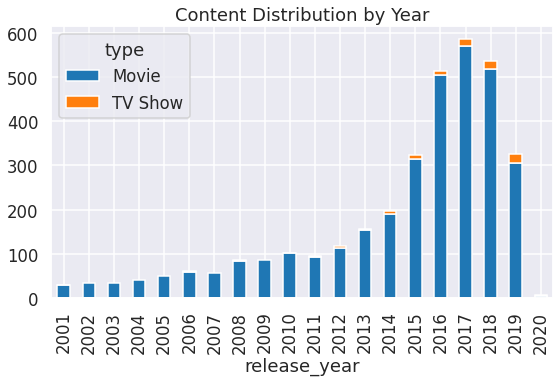

In [96]:
netflix_releaseyear_2k[['release_year', 'Movie', 'TV Show']].plot.bar(x='release_year',stacked=True, title='Content Distribution by Year');

Like expected, we can see here that after 2016 the number of TV shows being released has been steadily increasing, whereas the the Movie offerings have been falling after 2017.

## The distribution of Movies and TV Shows on Netflix for top 10 Directors who have worked on both mediums

Next, I wanted to look at the directors who have directed both Movies and TV shows and their ratios. 

Again, I pull out the unique combinations of Title, Director and Type and count number of occurances for Director and Type pairing. Reset the dataframe format to show Movie and TV Shows side by side against each director and pull out top 10 Directors by Total Content. 

Once done, I create a clusterd Bar chart to look at the distribution of work done by each director in TV shows vs Movies.

In [44]:
netflix_director_df = netflix_altered_df[['title','director', 'type']].drop_duplicates()
netflix_director_df #create a df for unique movie title, rating and type combination

,title,director,type
0,Norm of the North: King Sized Adventure,Richard Finn,Movie
1,Norm of the North: King Sized Adventure,Tim Maltby,Movie
181,#realityhigh,Fernando Lebrija,Movie
208,Automata,Gabe Ibáñez,Movie
316,Fabrizio Copano: Solo pienso en mi,Rodrigo Toro,Movie
...,...,...,...
138392,Miraculous: Tales of Ladybug & Cat Noir,Thomas Astruc,TV Show
138693,Sacred Games,Vikramaditya Motwane,TV Show
138694,Sacred Games,Anurag Kashyap,TV Show
138995,Men on a Mission,Jung-ah Im,TV Show


In [45]:
netflix_director_counts = netflix_director_df[['director', 'type']].value_counts()

netflix_director_counts

director              type   
Jan Suter             Movie      21
Raúl Campos           Movie      19
Jay Karas             Movie      14
Marcus Raboy          Movie      12
Jay Chapman           Movie      12
                                 ..
Michelle Caputo       Movie       1
Michel Tikhomiroff    TV Show     1
Michael Winterbottom  Movie       1
Michael Winnick       Movie       1
Kevin Derek           Movie       1
Length: 3228, dtype: int64

In [46]:
netflix_director_counts = (netflix_director_counts.unstack(level=-1).reset_index()).dropna()
netflix_director_counts

type,director,Movie,TV Show
209,Andrew Tan,1.0,1.0
268,Anurag Kashyap,5.0,1.0
825,Eli Roth,1.0,1.0
968,Gary Howsam,1.0,1.0
1117,Hiroyuki Seshita,3.0,1.0
1230,Jani Lachauer,1.0,1.0
1256,Jay Chandrasekhar,1.0,1.0
1316,Jerry Seinfeld,1.0,1.0
1348,Joe Berlinger,3.0,1.0
1407,John Paul Tremblay,4.0,1.0


In [47]:
netflix_director_counts['Total Number of Content'] = (netflix_director_counts.Movie + netflix_director_counts['TV Show'])
netflix_director_counts.sort_values(by=['Total Number of Content'], ascending=False)

type,director,Movie,TV Show,Total Number of Content
2374,Quentin Tarantino,6.0,1.0,7.0
268,Anurag Kashyap,5.0,1.0,6.0
2038,Mike Smith,4.0,1.0,5.0
2508,Robb Wells,4.0,1.0,5.0
1407,John Paul Tremblay,4.0,1.0,5.0
2807,Stan Lathan,2.0,2.0,4.0
1117,Hiroyuki Seshita,3.0,1.0,4.0
1348,Joe Berlinger,3.0,1.0,4.0
1585,Ken Burns,2.0,1.0,3.0
1637,Kobun Shizuno,2.0,1.0,3.0


In [48]:
netflix_topdirector_counts = netflix_director_counts.sort_values(by=['Total Number of Content'], ascending=False).head(10)
netflix_topdirector_counts

type,director,Movie,TV Show,Total Number of Content
2374,Quentin Tarantino,6.0,1.0,7.0
268,Anurag Kashyap,5.0,1.0,6.0
2038,Mike Smith,4.0,1.0,5.0
2508,Robb Wells,4.0,1.0,5.0
1407,John Paul Tremblay,4.0,1.0,5.0
2807,Stan Lathan,2.0,2.0,4.0
1117,Hiroyuki Seshita,3.0,1.0,4.0
1348,Joe Berlinger,3.0,1.0,4.0
1585,Ken Burns,2.0,1.0,3.0
1637,Kobun Shizuno,2.0,1.0,3.0


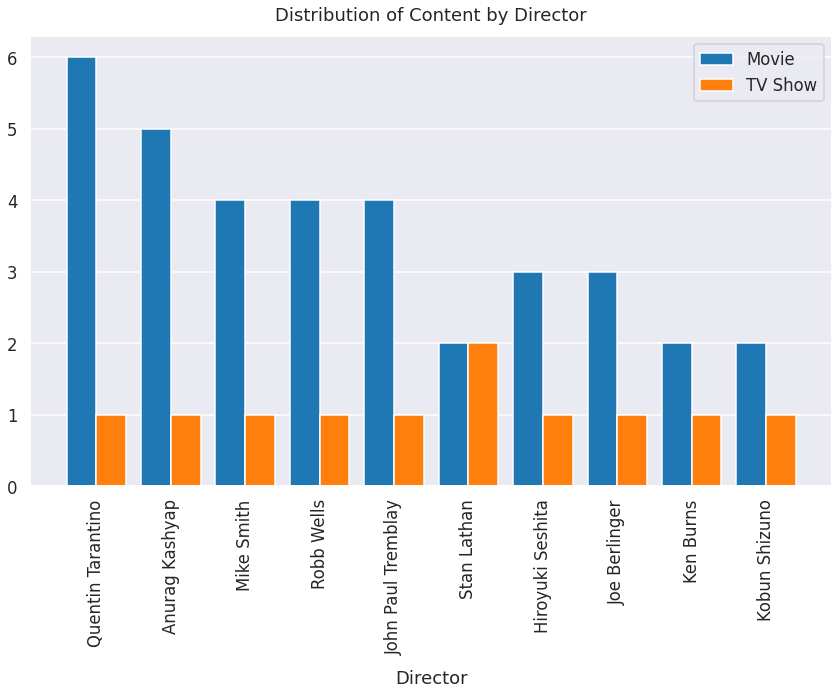

In [51]:
import numpy as np
sns.set_context('talk')

# Create a grouped bar chart, with director as the x-axis and type as the variable we're grouping on so there
# are two bars per director.
fig, ax = plt.subplots(figsize=(12, 10))

# Our x-axis. We basically just want a list of numbers from zero with a value for each of our directors.
x = np.arange(len(netflix_topdirector_counts.director))

#Define bar width. We need this to offset the second bar.
bar_width = 0.4

b1 = ax.bar(x, netflix_topdirector_counts.Movie,
             width=bar_width, label='Movie')

# Same thing, but offset the x.
b2 = ax.bar(x + bar_width, netflix_topdirector_counts['TV Show'],
             width=bar_width, label='TV Show')

# Fix the x-axes.
ax.set_xticks(x + bar_width / 2)
ax.set_xticklabels(netflix_topdirector_counts.director.unique(), rotation = 90)

# Add legend.
ax.legend()

# Axis styling.
# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)
# ax.spines['left'].set_visible(False)
# ax.spines['bottom'].set_color('#DDDDDD')
# ax.tick_params(bottom=False, left=False)
# ax.set_axisbelow(True)
ax.xaxis.grid(False)

# Add axis and chart labels.
ax.set_xlabel('Director', labelpad=15)
ax.set_title('Distribution of Content by Director', pad=15)

fig.tight_layout()

With this graph we can see that for directors who have worked on both TV shows and Movies, Quentin Tarantino has the most number of offerings on Netflix. But most directors only have one TV show offering on Netflix except for Stan Lathan - who has 2 TV Shows in his name.

## Inferences and Conclusion

There is a lot exploration possible with this dataset and even more so if we can merge it with external data sets. Integrating this dataset with other datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

Some of the interesting questions (tasks) which can be performed on this dataset -

1. Understanding what content is available in different countries by rating or genre
2. Identifying similar content by matching text-based features
3. Network analysis of Actors / Directors and find interesting insights
4. Further exploratory analysis to see if Netflix is increasingly focusing on TV rather than movies in recent years.

